In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [23]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [25]:
X_train= X_train/255
X_test=X_test/255
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

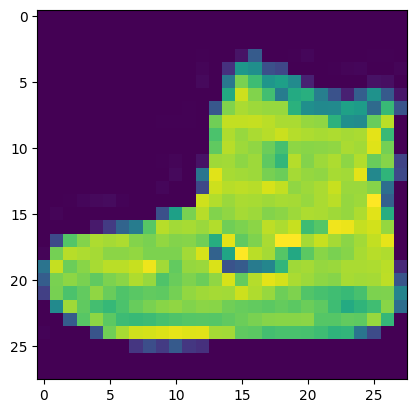

In [26]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D

In [13]:
model = Sequential()

In [17]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.8073 - loss: 0.5355 - val_accuracy: 0.8943 - val_loss: 0.2975
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9037 - loss: 0.2695 - val_accuracy: 0.9066 - val_loss: 0.2571
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9211 - loss: 0.2137 - val_accuracy: 0.9112 - val_loss: 0.2457
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9348 - loss: 0.1817 - val_accuracy: 0.9069 - val_loss: 0.2569
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 35ms/step - accuracy: 0.9456 - loss: 0.1470 - val_accuracy: 0.9128 - val_loss: 0.2525


In [28]:
items=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

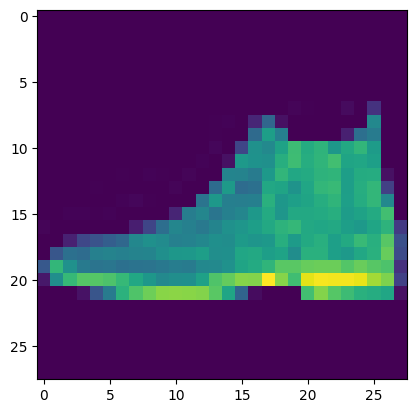

In [29]:
plt.imshow(X_test[0])

In [36]:
predictions=model.predict(X_test[0].reshape(1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [38]:
import numpy as np
item = items[np.argmax(predictions)]
item

'Ankle boot'

In [41]:
#model accuracy
y_predict=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[853   0  12  10   2   0 106   0  17   0]
 [  2 978   0  10   2   0   5   0   3   0]
 [ 18   1 864   5  47   0  63   0   2   0]
 [ 15   4   9 889  25   0  50   0   8   0]
 [  2   1  86  22 849   0  36   0   4   0]
 [  0   0   0   0   0 975   0  19   1   5]
 [ 90   1  53  17  61   0 767   0  11   0]
 [  0   0   0   0   0   7   0 980   1  12]
 [  2   0   0   3   1   2   0   5 987   0]
 [  0   0   0   0   0   8   1  42   1 948]]
0.909
